<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import sympy as smp
from sympy.abc import theta, phi
from sympy import *
from sympy import trigsimp
import numpy as np
from IPython.display import display, Math
smp.init_printing()

In [3]:
r, theta, phi = smp.symbols('r theta phi')

# Part A

Supplementary to the work done in part a). This matrix and its inverse are also needed in part b).

## Coordinate Transform Matrix

This defines

$${\Lambda^{\beta}}_{\alpha} = \frac{\partial x^\beta}{\partial x^{\alpha}} $$

In [4]:
LAM = Matrix([[smp.sin(theta)*smp.cos(phi), r*smp.cos(theta)*smp.cos(phi), -r*smp.sin(theta)*smp.sin(phi)],
              [smp.sin(theta)*smp.sin(phi), r*smp.cos(theta)*smp.sin(phi), r*smp.sin(theta)*smp.cos(phi)],
              [smp.cos(theta), -r*smp.sin(theta), 0]])
LAM_inv = smp.simplify(LAM**-1)

Print ${\Lambda^{\beta}}_{\alpha}$ in matrix form:

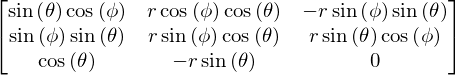

In [5]:
LAM

Print ${(\Lambda^{-1})^{\beta}}_{\alpha}$ in matrix form:

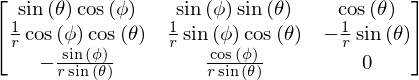

In [6]:
LAM_inv

# Part B

## Calculation of the Metric

Calculate the metric using

$$g_{u'v'}=g_{uv}{\Lambda^u}_{u'}{\Lambda^v}_{v'}=\Lambda^T g \Lambda $$

In [7]:
g = smp.simplify((LAM.T*LAM))
g_inv = smp.simplify(g**-1)

Print $g$ in matrix form:

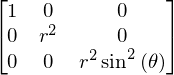

In [8]:
g

Print $g^{-1}$ in matrix form:

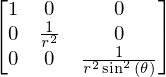

In [9]:
g_inv

# Part C

All done by hand: see written work.

# Part D

## Calculation of Christofel Symbols

Compute 

$$\Gamma_{\alpha \beta}^{\mu} = \frac{1}{2}g^{u \lambda}\left(\frac{\partial g_{\lambda \beta}}{\partial x_\alpha}+\frac{\partial g_{\alpha \lambda}}{\partial x_{\beta}}-\frac{\partial g_{\alpha \beta}}{\partial x_{\lambda}} \right)$$

In [10]:
coords = [r, theta, phi]

In [11]:
def get_christofel(a, b, u):
    result = 0
    for lam in range(3):
        g_lam_beta = g.row(lam)[b]
        g_alpha_lam = g.row(a)[lam]
        g_alpha_beta =  g.row(a)[b]
        
        deriv_1 = diff(g_lam_beta, coords[a])
        deriv_2 = diff(g_alpha_lam, coords[b])
        deriv_3 = diff(g_alpha_beta, coords[lam])
        
        result += g_inv.row(u)[lam]*(deriv_1+deriv_2-deriv_3)/2
    
    return result

In [12]:
cds_label = ['r', r'\theta', r'\phi']

Print and store Christofel symbols in a new 3D array.

In [13]:
christ_array = np.empty((3,3,3), dtype=object)
for a in range(3):
    for b in range(3):
        for u in range(3):
            christ_array[u][a][b] = get_christofel(a,b,u)
            display(Math(r'\Gamma^{'+cds_label[u]+'}_{'+cds_label[a]+ ' '+
                         cds_label[b]+'} = '+ r'{}'.format(latex(get_christofel(a,b,u))))), 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Based on this list, all the Christofel symbols appear to be equal.

# Part E

Gives us the components of

$$\nabla_u g_{\alpha \beta} = \partial_u g_{\alpha \beta} − g_{v \beta} \Gamma^{v}_{\alpha u} -g_{av}\Gamma^{v}_{\beta u}$$

In [14]:
def get_comps(a, b, u):
    term_1 = diff(g.row(a)[b], coords[u])
    term_2 = 0
    term_3 = 0
    for v in range(3):
        term_2 += g.row(v)[b]*christ_array[v][a][u]
        term_3 += g.row(a)[v]*christ_array[v][b][u]

    return trigsimp(term_1-term_2-term_3)

Print all the terms:

In [15]:
for a in range(3):
    for b in range(3):
        for u in range(3):
            display(Math(r'\nabla_{'+cds_label[u]+'}'+
                         'g_{'+cds_label[a] + ' ' + cds_label[b] + '}' + '= {}'.format(latex(get_comps(a,b,u))))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

So all the terms are zero.